## Exploratory Data Analysis
In this Notebook we do some extra EDA mainly focused on our target variable (arr_delay)

In [2]:
#import needed libraries & float format definition

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from scipy.stats import norm
from matplotlib import pyplot
from matplotlib.pyplot import figure

In [7]:
#Loading Flights table
path = 'flights-2018-2019.csv'
Flights = pd.read_csv(path)


In [8]:
Flights.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,row_num
0,2018-01-01,WN,WN,WN,5705,WN,N8510E,5705,15304,TPA,...,0.0,0.0,0.0,0.0,21.0,NaN,NaN,NaN,NaN,1
1,2018-01-01,WN,WN,WN,988,WN,N287WN,988,13495,MSY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20
2,2018-01-01,WN,WN,WN,1236,WN,N729SW,1236,13495,MSY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30
3,2018-01-01,WN,WN,WN,233,WN,N958WN,233,13495,MSY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35
4,2018-01-01,WN,WN,WN,446,WN,N7708E,446,13495,MSY,...,0.0,0.0,23.0,0.0,0.0,NaN,NaN,NaN,NaN,40


In [107]:
print(Flights .shape)

(14600, 43)


In [108]:
columns = Flights.columns
columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name', 'row_num'],
      dtype='object')

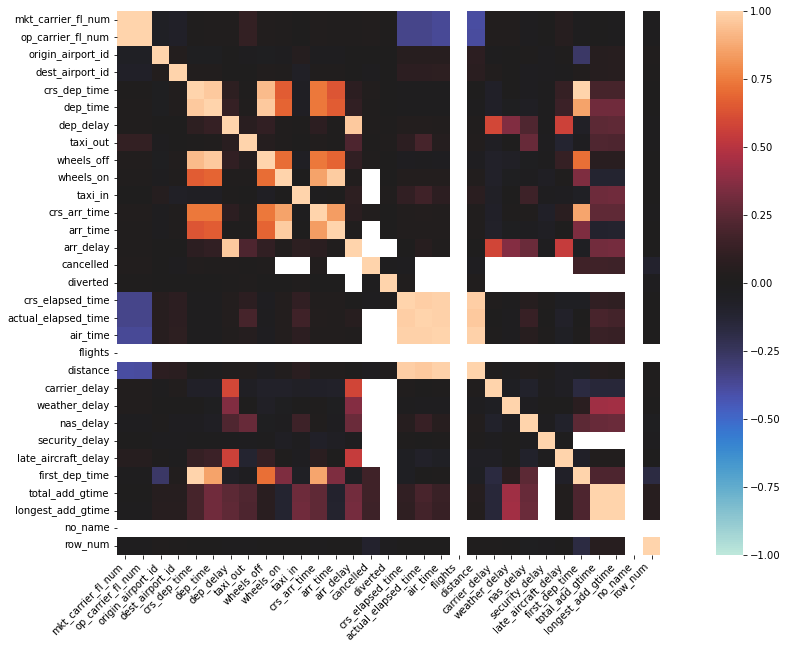

In [110]:
# Correlation Matrix to understand the nature of correlation between features in our data set 
corr=Flights.corr()
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(corr, 
    vmin=-1, vmax=1, center=0,
    square=True)
ticks = ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

### Interesting insights about our prediction (arr_dealy) distribution using visualization and statistics 

Percentage of delayed flights 35.26027397260274%


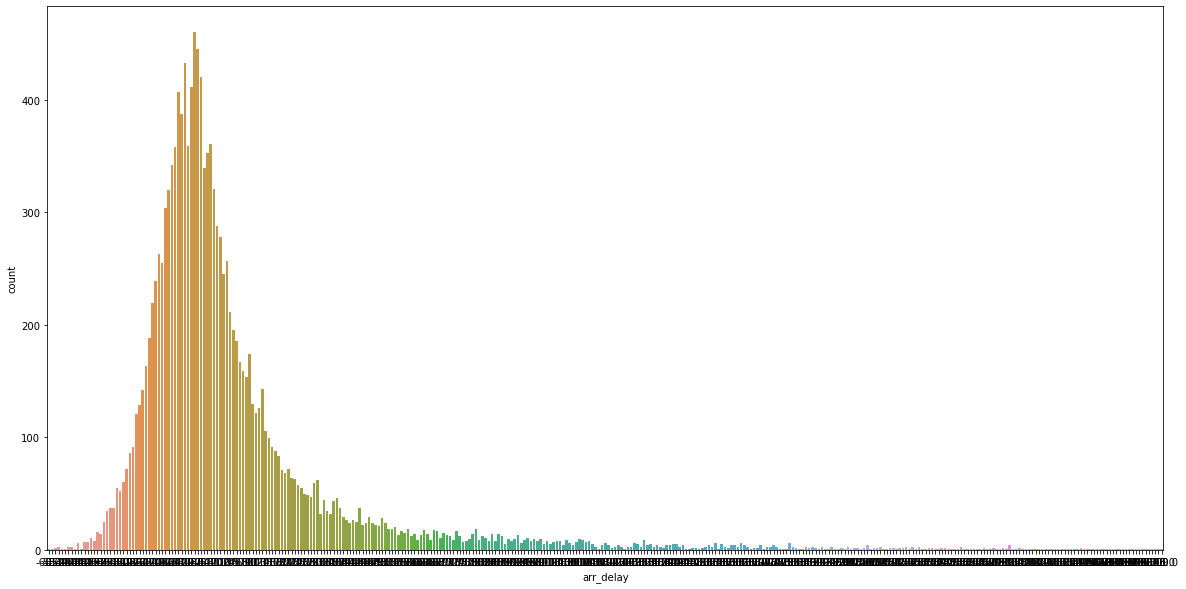

In [16]:
# % of delayed flights in our data 
Delayed_count = len(Flights[Flights['arr_delay']>=0])
pct_of_delayed = Delayed_count/(len(Flights.arr_delay))
print(f"Percentage of delayed flights {pct_of_delayed*100}%")
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.countplot(data =Flights , x = 'arr_delay')

In [12]:
#Function that classifies delay into 5 sections
from function_helpers import classify

In [14]:
#Creating new column for delay group
Arr_DF = Flights[['origin', 'dest', 'arr_delay']]
Arr_DF['Delay Amount'] = Arr_DF ['arr_delay'].apply(lambda x: classify(x))

/var/folders/vr/r8mf2bqs5rq239fpzg2_n3z00000gn/T/ipykernel_10984/867378796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Arr_DF['Delay Amount'] = Arr_DF ['arr_delay'].apply(lambda x: classify(x))


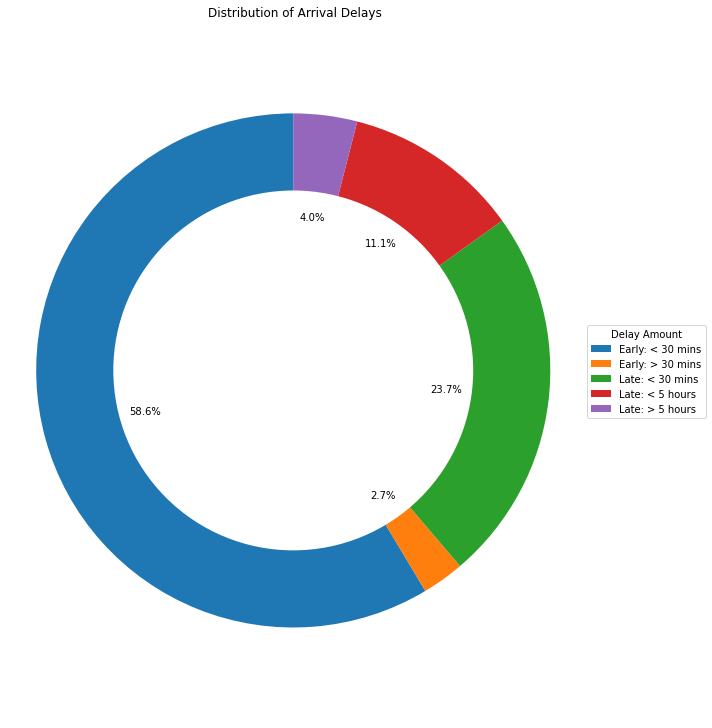

In [15]:
#Plotting Pie Chart
import matplotlib.pyplot as plt

group_arr_count = pd.DataFrame({'Count' : Arr_DF.groupby([ "Delay Amount"] ).size()}).reset_index()

total = group_arr_count['Count'].sum()
group_arr_count['Percent'] = group_arr_count['Count'].apply(lambda x: (x / total) * 100) 
group_arr_count.sort_values('Count', ascending=True)

# Pie chart
labels = group_arr_count['Delay Amount']
sizes = group_arr_count['Percent']
#colors
#colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05,0.05,0.05, 0.5)


fig1, ax1 = plt.subplots(figsize=(10, 10))
wedges, texts, autotexts = ax1.pie(sizes, autopct='%1.1f%%', startangle=90)

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1.legend(wedges, labels,
          title="Delay Amount",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()

plt.setp(texts, size=8, weight="bold")

ax1.set_title("Distribution of Arrival Delays")

plt.show()

Percentage of cancelled flights 3.0821917808219177%


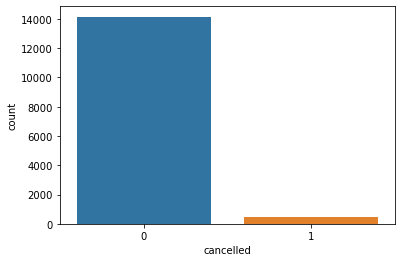

In [112]:
# % Of cancelled flights in our Data set 

CANCELLED_count = len(Flights[Flights['cancelled']==1])
pct_of_CANCELLED = CANCELLED_count/(len(Flights.cancelled))
print(f"Percentage of cancelled flights {pct_of_CANCELLED*100}%")
ax = sns.countplot(data = Flights, x = 'cancelled')

(-200.0, 600.0)

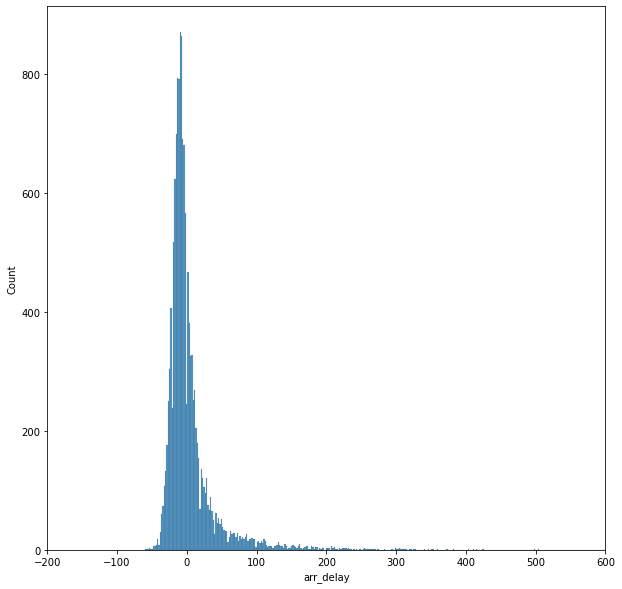

In [17]:
# One way to see if the Data is normally distributed or not is to plot a histogram
# sns.histplot(data = Flights['arr_delay'])
a4_dims = (10, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.histplot(ax=ax,data = Flights['arr_delay'])
plt.xlim(-200, 600)

In [44]:
# Checking data Skewness
### A skewness value greater than 1 or less than -1 indicates a highly skewed distribution.
### A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.
Flights['arr_delay'].skew()

9.15531071849212

### Interesting insights between our target variable (arr_delay) and departure delay 
- One would assume am assuming that if your departure is on time and the flight is late on arrival, then this means that something else increased your elapse time, which is supposed to be the planned time needed for the fl|ight trip.
- One would assume that if you depart late the odds that you would also arrive late is high. Lets see if our data supports that claim 

In [ ]:
# Flights['OP_CARRIER'].replace({
#     'UA':'United Airlines',
#     'AS':'Alaska Airlines',
#     '9E':'Endeavor Air',
#     'B6':'JetBlue Airways',
#     'EV':'ExpressJet',
#     'F9':'Frontier Airlines',
#     'G4':'Allegiant Air',
#     'HA':'Hawaiian Airlines',
#     'MQ':'Envoy Air',
#     'NK':'Spirit Airlines',
#     'OH':'PSA Airlines',
#     'OO':'SkyWest Airlines',
#     'VX':'Virgin America',
#     'WN':'Southwest Airlines',
#     'YV':'Mesa Airline',
#     'YX':'Republic Airways',
#     'AA':'American Airlines',
#     'DL':'Delta Airlines'
# }, inplace=True)

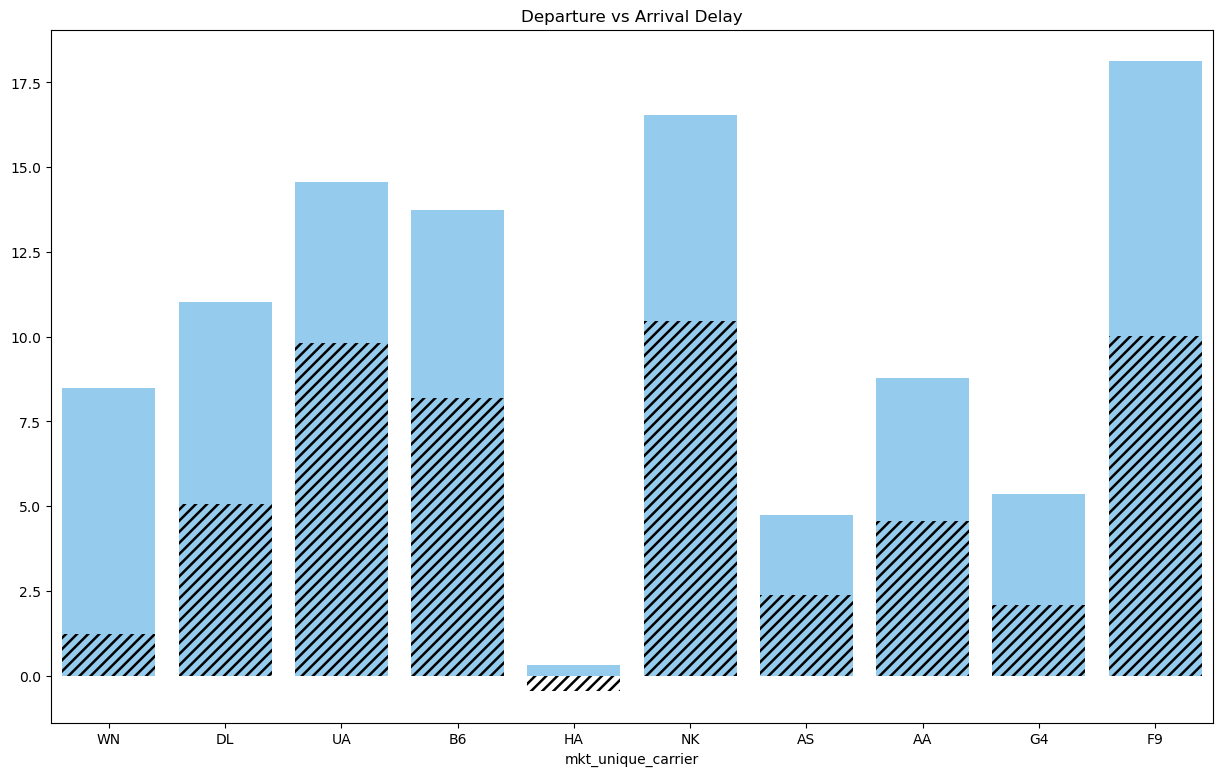

In [43]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['hatch.linewidth'] = 1.8  

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="mkt_unique_carrier", y="dep_delay", data=Flights, color="lightskyblue", ci=None)
ax = sns.barplot(x="mkt_unique_carrier", y="arr_delay", data=Flights, color="r", hatch = '///', alpha = 0.0, ci=None)
ax.yaxis.label.set_visible(False)
plt.title('Departure vs Arrival Delay')
plt.ylabel('Mean delay (min)', fontsize=14, labelpad=10);

# mkt_unique_carrier
# op_unique_carrier

### The results of the plot are quite interesting suggesting that the ARR_DELAYS are generally lower than the DEP_DELAYS. This can suggest that the airlines try to adjust their flight speed to try and compensate for the late departure and reduce the ARR_DELAY.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


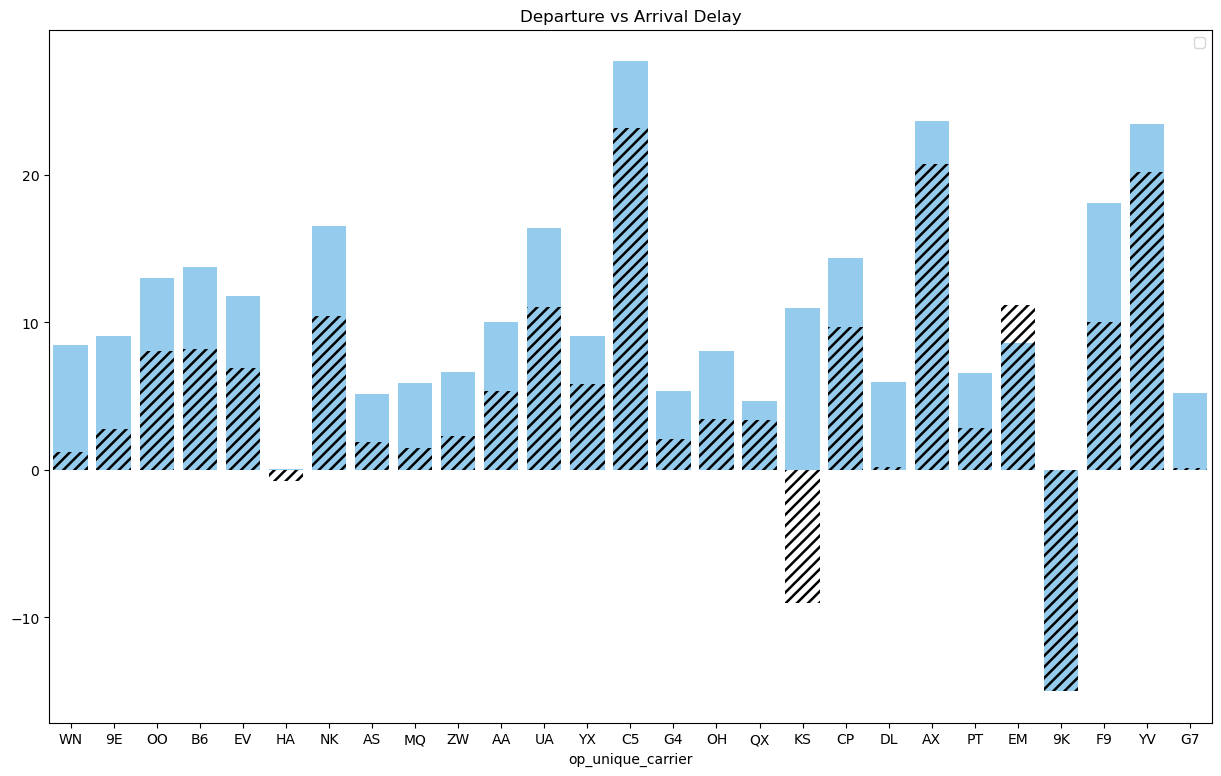

In [42]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams['hatch.linewidth'] = 1.8  

fig = plt.figure(1, figsize=(15,9))
ax = sns.barplot(x="op_unique_carrier", y="dep_delay", data=Flights, color="lightskyblue", ci=None)
ax = sns.barplot(x="op_unique_carrier", y="arr_delay", data=Flights, color="r", hatch = '///', alpha = 0.0, ci=None)
ax.yaxis.label.set_visible(False)
plt.title('Departure vs Arrival Delay')
plt.ylabel('Mean delay (min)', fontsize=14, labelpad=10);
plt.legend()
